In [24]:
import numpy as np
import pandas as pd
import quandl, math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
df = quandl.get('WIKI/IBM', start_date='2012-9-5', end_date='2017-9-5')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-09-05,194.41,195.85,193.89,195.04,3312500.0,0.0,1.0,168.143127,169.388567,167.693384,168.688007,3312500.0
2012-09-06,196.26,199.46,196.11,199.10,3931700.0,0.0,1.0,169.743172,172.510818,169.613438,172.199457,3931700.0
2012-09-07,199.12,199.50,198.08,199.50,3413700.0,0.0,1.0,172.216755,172.545413,171.317270,172.545413,3413700.0
2012-09-10,199.39,201.82,198.73,200.95,4208000.0,0.0,1.0,172.450275,174.551956,171.879448,173.799503,4208000.0
2012-09-11,200.55,203.46,200.51,203.27,3910600.0,0.0,1.0,173.453547,175.970375,173.418951,175.806046,3910600.0


In [12]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2012-09-05,168.143127,169.388567,167.693384,168.688007,3312500.0
2012-09-06,169.743172,172.510818,169.613438,172.199457,3931700.0
2012-09-07,172.216755,172.545413,171.317270,172.545413,3413700.0
2012-09-10,172.450275,174.551956,171.879448,173.799503,4208000.0
2012-09-11,173.453547,175.970375,173.418951,175.806046,3910600.0


In [15]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

In [16]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [18]:
df.tail()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2017-08-29,142.10,143.4250,141.90,143.14,3000993.0,1.065391,0.731879
2017-08-30,143.26,143.2800,142.41,142.56,2715466.0,0.610269,-0.488622
2017-08-31,143.02,143.6600,142.63,143.03,3614517.0,0.720129,0.006992
2017-09-01,142.98,144.5000,142.98,144.08,3348503.0,1.054969,0.769338
2017-09-05,143.50,144.3575,142.70,143.04,3097503.0,1.158767,-0.320557


In [25]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [26]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [27]:
df.dropna(inplace=True)

In [28]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [29]:
X = preprocessing.scale(X)

In [30]:
y = np.array(df['label'])

In [31]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [32]:
clf = svm.SVR()

In [37]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
confidence = clf.score(X_test, y_test)
confidence

0.84532701811454758

In [36]:
clf = LinearRegression()

In [39]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.845628500436
poly 0.178033254634
rbf 0.767724122086
sigmoid -2.80357402617


In [42]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [43]:
forecast_set = clf.predict(X_lately)

In [44]:
forecast_set, confidence, forecast_out

(array([ 135.11232859,  133.32243964,  133.9151995 ,  133.28497303,
         133.13863538,  136.88073834,  134.18008602,  134.25424862,
         137.12623582,  134.24770005,  133.55422378,  142.52098652,
         134.57141152]), -2.8035740261695543, 13)

In [53]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [48]:
style.use('ggplot')

In [49]:
df['Forecast'] = np.nan

In [50]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [51]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

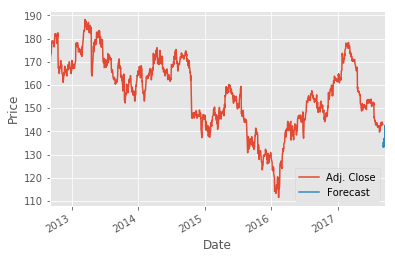

In [54]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()